In [8]:
import numpy as np  
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score, accuracy_score

In [9]:
# import pandas as pd
# from faker import Faker
# import random

# fake = Faker()

# def generate_fake_data(num_rows):
#     data = []
#     for _ in range(num_rows):
#         pregnancies = random.randint(0, 17)
#         glucose = random.randint(0, 200)
#         blood_pressure = random.randint(0, 150)
#         skin_thickness = random.randint(0, 100)
#         insulin = random.randint(0, 300)
#         bmi = random.uniform(0, 50)
#         diabetes_pedigree_function = random.uniform(0, 2)
#         age=random.randint(0,90)
#         outcome = random.choice([0, 1])
        
#         data.append({
#             'Pregnancies': pregnancies,
#             'Glucose': glucose,
#             'BloodPressure': blood_pressure,
#             'SkinThickness': skin_thickness,
#             'Insulin': insulin,
#             'BMI': bmi,
#             'DiabetesPedigreeFunction': diabetes_pedigree_function,
#             'Age': age,
#             'Outcome': outcome
#         })
#     return data

# # Generate fake data
# fake_data = generate_fake_data(10000)

# # Create a DataFrame from the existing data
# existing_data = pd.read_csv('diabetes.csv')

# # Concatenate existing data with fake data
# combined_data = pd.concat([existing_data, pd.DataFrame(fake_data)], ignore_index=True)

# # Save to Excel
# combined_data.to_csv('data.csv', index=False)


In [10]:
# Read the dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [13]:

# X = diabetes_dataset.drop(columns=['Outcome'])  
# y = diabetes_dataset['Outcome']   
# smote = SMOTE(sampling_strategy='auto', random_state=42)  
# X_resampled, y_resampled = smote.fit_resample(X, y)
# df = pd.concat([X_resampled, y_resampled], axis=1)
# df

In [14]:
df=df.sample(frac=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
648,11,136,84,35,130,28.3,0.260,42,1
248,9,124,70,33,402,35.4,0.282,34,0
59,0,105,64,41,142,41.5,0.173,22,0
688,1,140,74,26,180,24.1,0.828,23,0
464,10,115,98,0,0,24.0,1.022,34,0
...,...,...,...,...,...,...,...,...,...
608,0,152,82,39,272,41.5,0.270,27,0
172,2,87,0,23,0,28.9,0.773,25,0
281,10,129,76,28,122,35.9,0.280,39,0
46,1,146,56,0,0,29.7,0.564,29,0


In [15]:
X = df.drop(columns=['Outcome'])  
y = df['Outcome']  
smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X, y)
df = pd.concat([X_resampled, y_resampled], axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,11,136,84,35,130,28.300000,0.260000,42,1
1,9,124,70,33,402,35.400000,0.282000,34,0
2,0,105,64,41,142,41.500000,0.173000,22,0
3,1,140,74,26,180,24.100000,0.828000,23,0
4,10,115,98,0,0,24.000000,1.022000,34,0
...,...,...,...,...,...,...,...,...,...
995,0,118,84,43,226,45.720488,0.653173,30,1
996,0,176,79,46,540,42.898333,0.436223,26,1
997,6,161,62,0,0,25.597640,0.221609,47,1
998,2,173,82,32,474,35.640814,0.301798,21,1


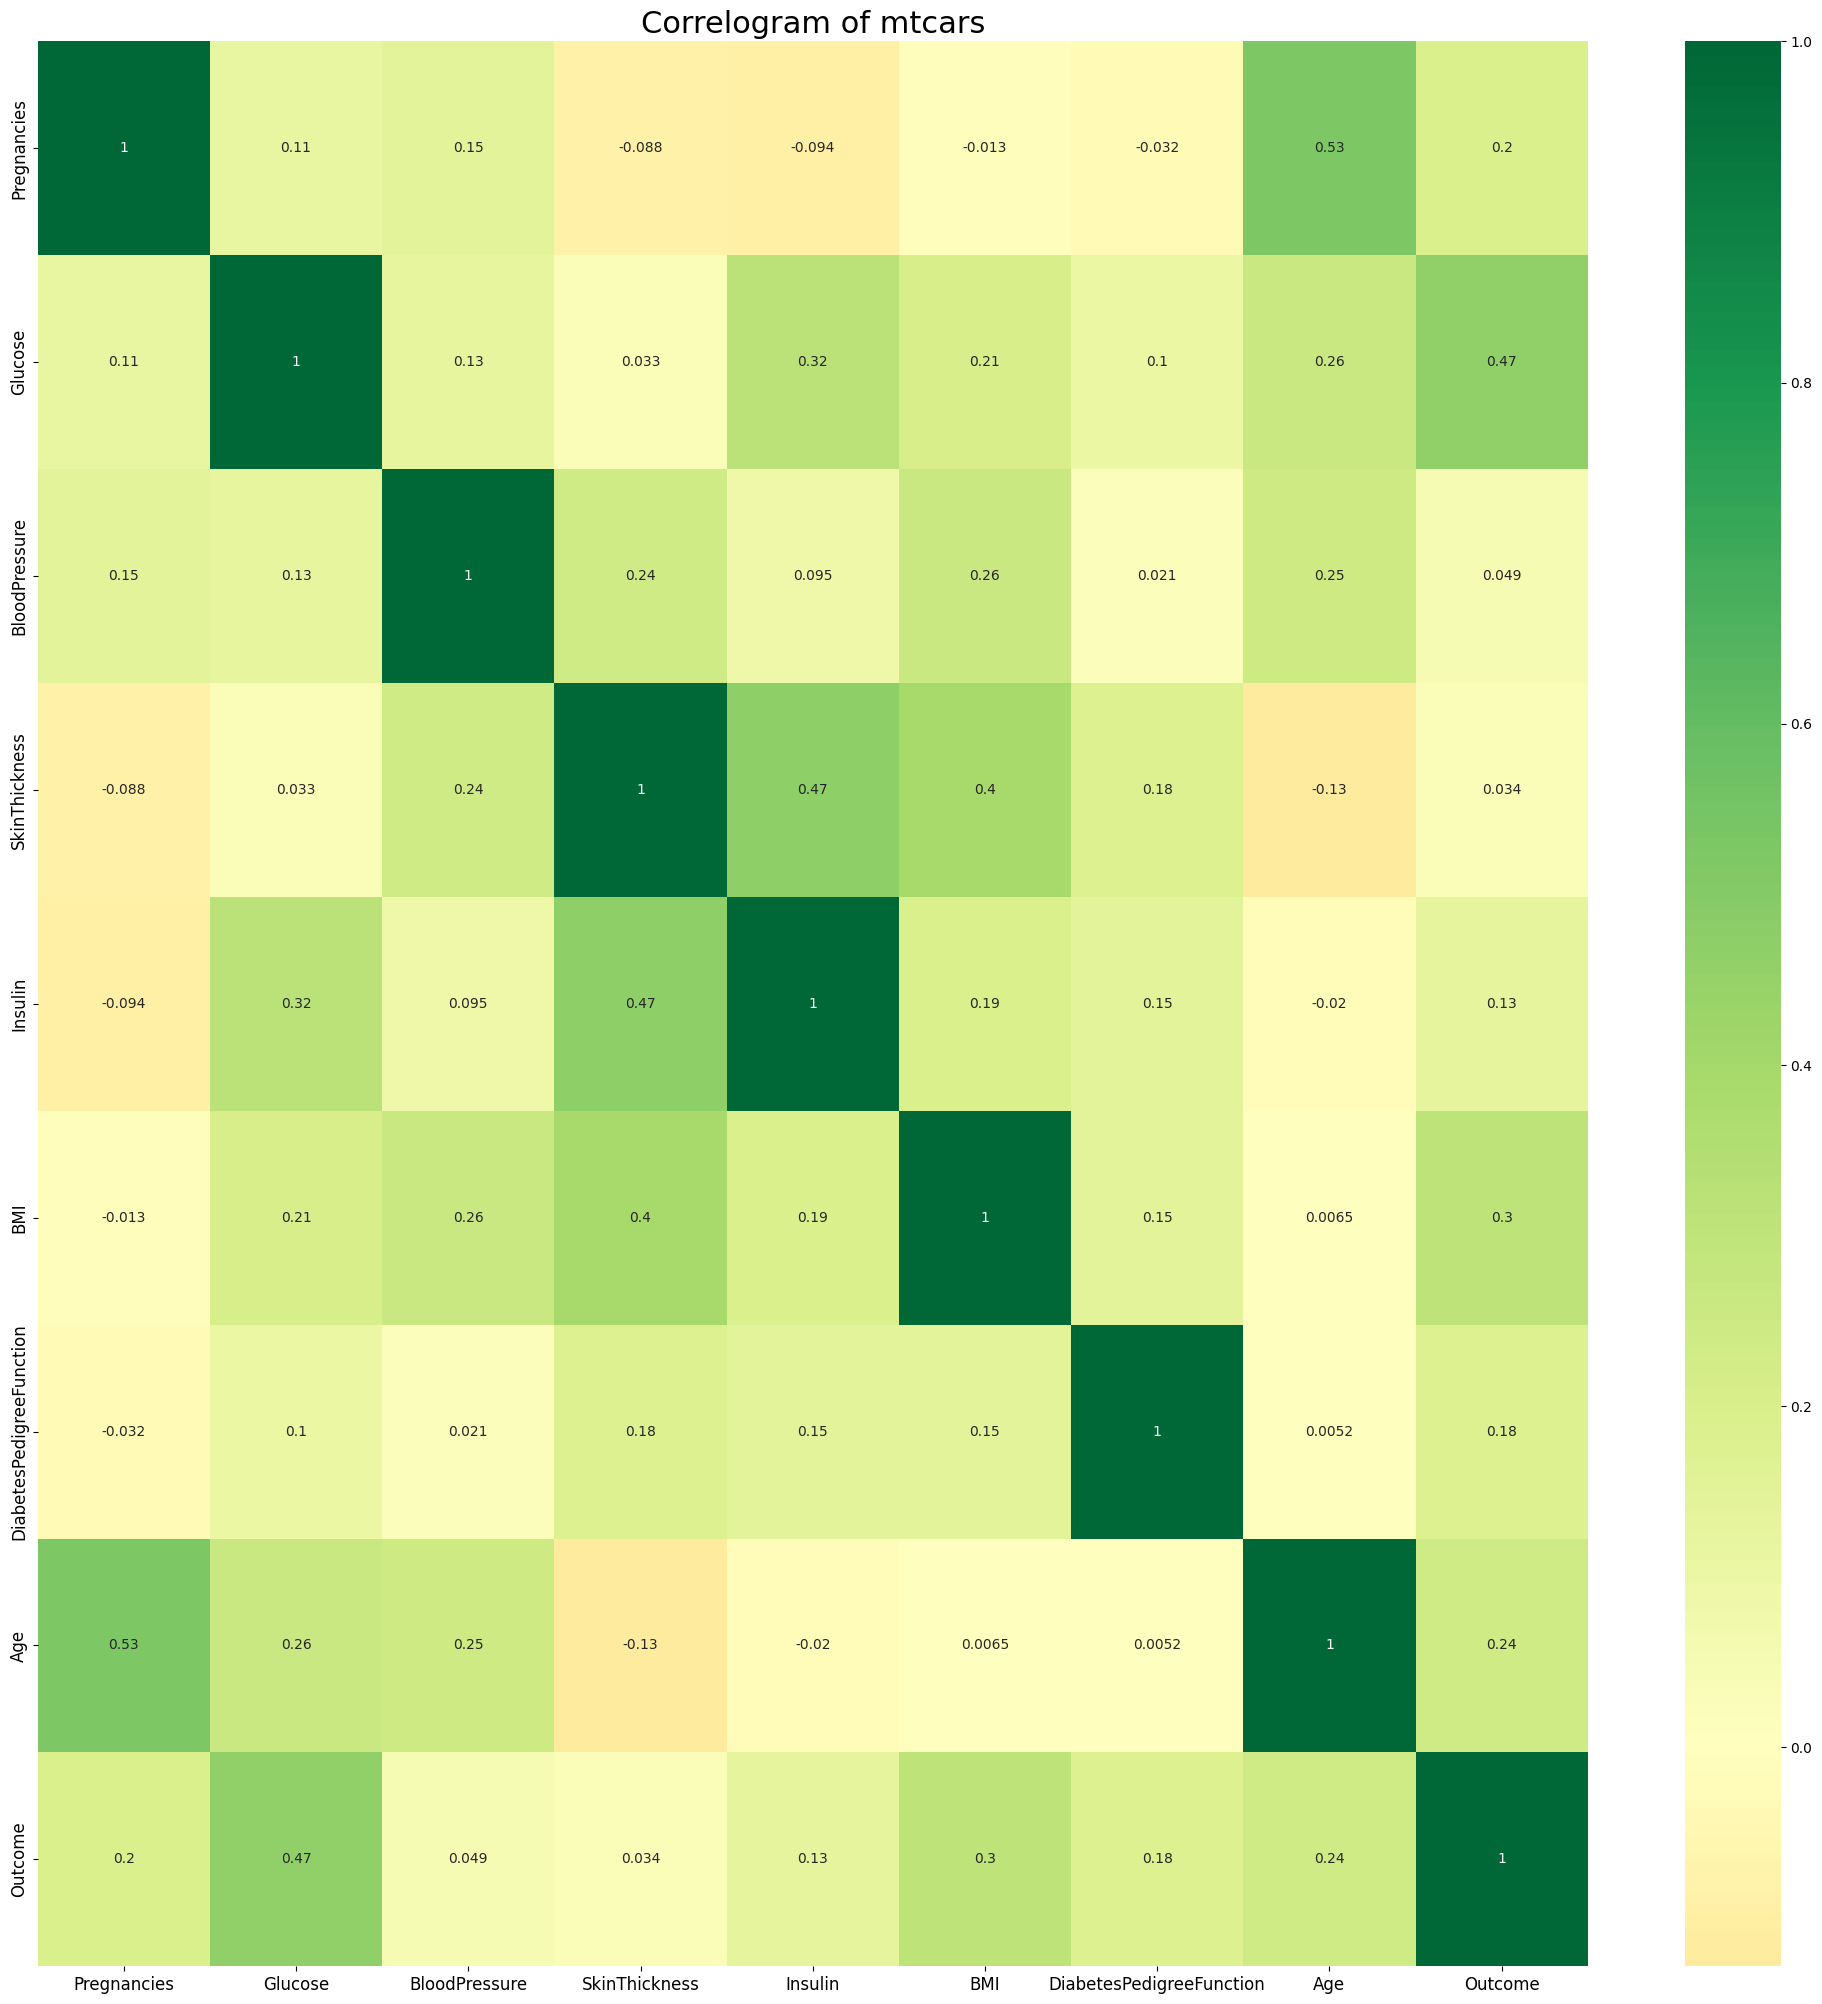

In [16]:
plt.figure(figsize=(25,25), dpi= 100)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

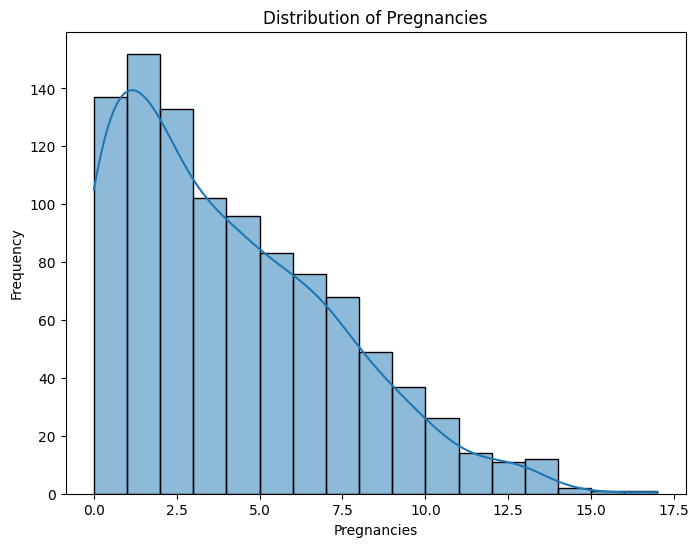

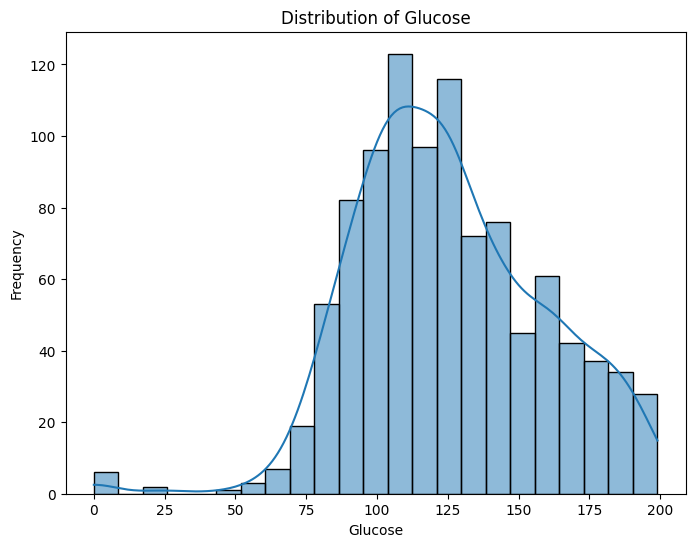

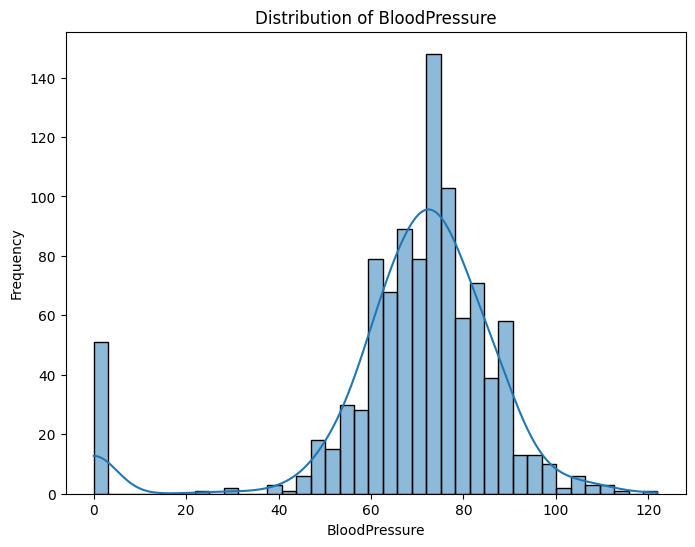

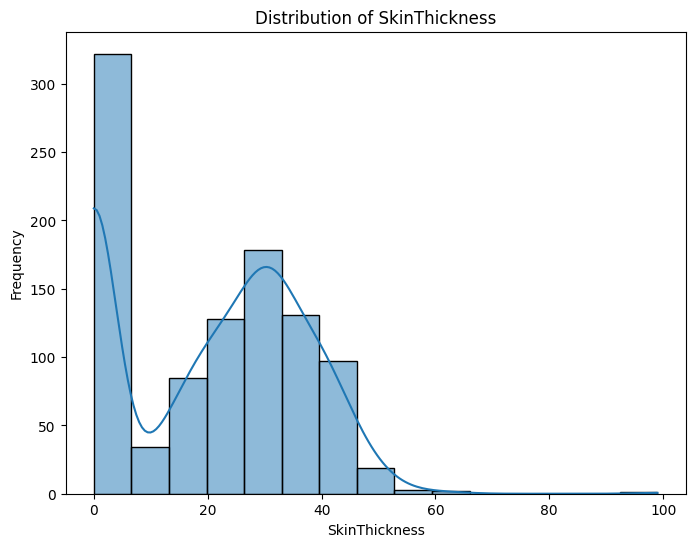

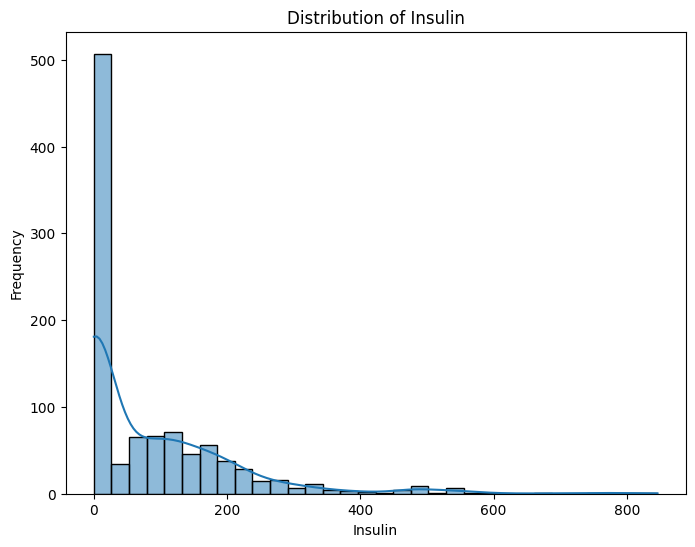

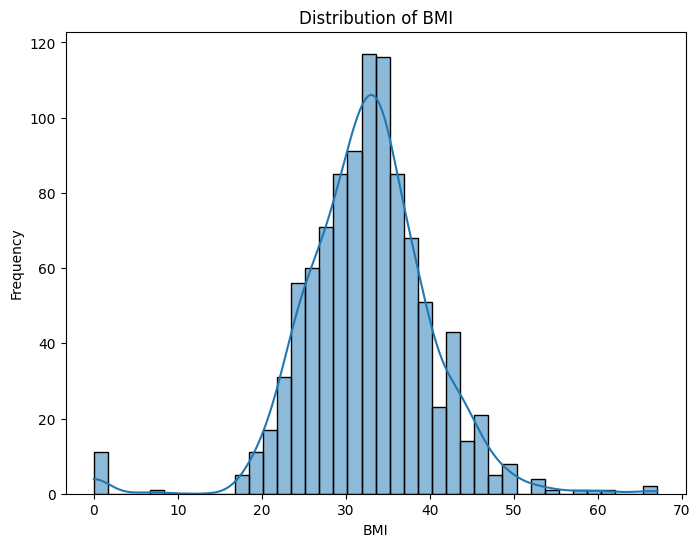

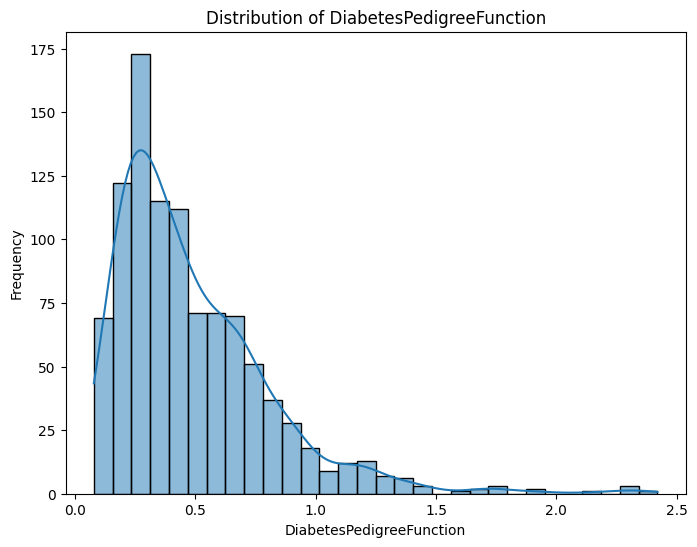

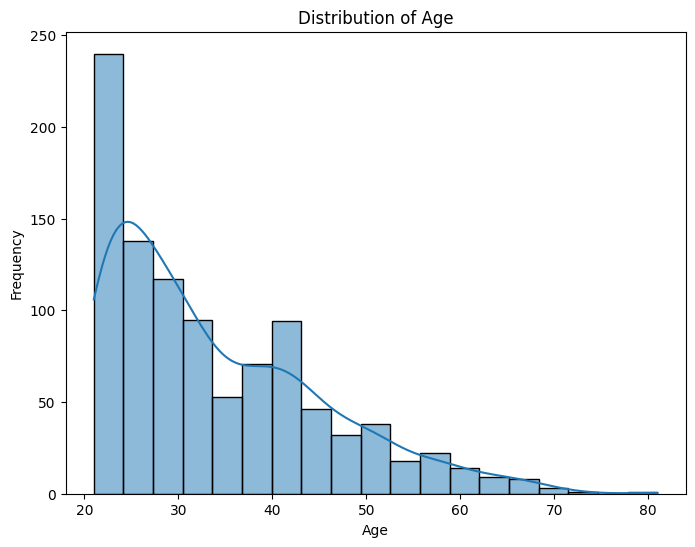

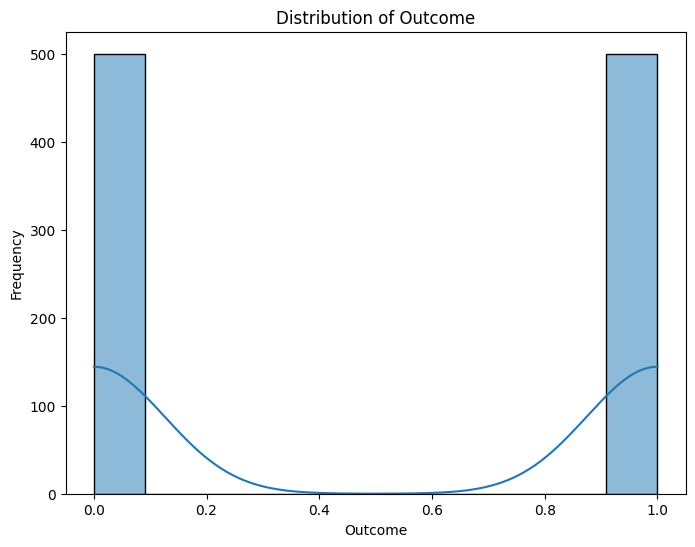

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Iterate over each column in the DataFrame
for column in df.columns:
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the distribution of the column using a histogram
    sns.histplot(df[column], kde=True, ax=ax)
    
    # Add labels and title
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {column}')
    
    # Show the plot
    plt.show()


In [18]:
df=df.sample(frac=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
798,3,131,88,45,156,35.060512,0.798611,30,1
137,2,144,58,33,135,31.600000,0.422000,25,1
14,0,125,96,0,0,22.500000,0.262000,21,0
749,13,106,70,0,0,34.200000,0.251000,52,0
49,1,181,64,30,180,34.100000,0.328000,38,1
...,...,...,...,...,...,...,...,...,...
854,5,128,71,0,0,28.939580,0.670894,26,1
440,1,109,56,21,135,25.200000,0.833000,23,0
644,9,165,88,0,0,30.400000,0.302000,49,1
85,4,84,90,23,56,39.500000,0.159000,25,0


In [19]:
X=df.iloc[:,0:8]
X = np.log1p(X)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
798,1.386294,4.882802,4.488636,3.828641,5.056246,3.585198,0.587014,3.433987
137,1.098612,4.976734,4.077537,3.526361,4.912655,3.484312,0.352064,3.258097
14,0.000000,4.836282,4.574711,0.000000,0.000000,3.157000,0.232698,3.091042
749,2.639057,4.672829,4.262680,0.000000,0.000000,3.561046,0.223943,3.970292
49,0.693147,5.204007,4.174387,3.433987,5.198497,3.558201,0.283674,3.663562
...,...,...,...,...,...,...,...,...
854,1.791759,4.859812,4.276666,0.000000,0.000000,3.399181,0.513359,3.295837
440,0.693147,4.700480,4.043051,3.091042,4.912655,3.265759,0.605954,3.178054
644,2.302585,5.111988,4.488636,0.000000,0.000000,3.446808,0.263902,3.912023
85,1.609438,4.442651,4.510860,3.178054,4.043051,3.701302,0.147558,3.258097


In [20]:
y=df.iloc[:, 8]

In [21]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=128)
scorer = make_scorer(f1_score)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
new_threshold = 0.3
rf_probabilities = best_rf_model.predict_proba(X_test)[:, 1]
rf_predictions = (rf_probabilities > new_threshold).astype(int)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Best Parameters:", grid_search.best_params_)
print(f"F1 Score: {grid_search.best_score_:.4f}")
print(f"Accuracy: {rf_accuracy * 100:.2f}%")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
F1 Score: 0.8300
Accuracy: 76.50%


In [ ]:
conf_matrix = confusion_matrix(y_test, rf_predictions)
print("Best Parameters:", grid_search.best_params_)
print("Confusion Matrix \n",conf_matrix)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Confusion Matrix 
 [[ 56  30]
 [  9 105]]


In [ ]:
rf_classification_report = classification_report(y_test, rf_predictions)
print("Classification Report:\n", rf_classification_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.65      0.74        86
           1       0.78      0.92      0.84       114

    accuracy                           0.81       200
   macro avg       0.82      0.79      0.79       200
weighted avg       0.81      0.81      0.80       200



In [ ]:
from sklearn.metrics import accuracy_score

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

best_threshold = None
best_accuracy = 0


for threshold in thresholds:
    rf_predictions = (rf_probabilities > threshold).astype(int)
    accuracy = accuracy_score(y_test, rf_predictions)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print("Best Threshold:", best_threshold)
print("Best Accuracy:", best_accuracy)


Best Threshold: 0.5
Best Accuracy: 0.82


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RFC
rf_model = RandomForestClassifier(random_state=128)

scorer = make_scorer(accuracy_score)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring=scorer, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
new_threshold = 0.5

# Get probabilities and make predictions based on the new threshold
rf_probabilities = best_rf_model.predict_proba(X_test)[:, 1]
rf_predictions = (rf_probabilities > new_threshold).astype(int)

rf_accuracy = accuracy_score(y_test, rf_predictions)

# results print krdo
print("Best Parameters:", grid_search.best_params_)
print(f"Accuracy: {rf_accuracy * 100:.2f}%")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 82.00%


In [ ]:
rf_classification_report = classification_report(y_test, rf_predictions)
print("Classification Report:\n", rf_classification_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80        86
           1       0.88      0.80      0.83       114

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200

